In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn.impute
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import env
import acquire
import prepare

pd.set_option('display.max_columns', None)

In [2]:
df = acquire.get_telco_data()

In [3]:
# split data into train, validate and test
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_telco(df)

In [4]:
X_train.shape

(4500, 25)

In [5]:
#print(X_train.head())
X_train.head()

,gender,senior_citizen,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,tenure_years,phone_and_multi_line,partner_and_dependents,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic,None,Month-to-month,One year,Two year
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
3714-JTVOV,0,1,2,0,0,0,0,0,1,74.15,3229.40,1,3.500000,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3049-SOLAY,0,0,0,0,0,0,2,2,1,95.20,292.85,1,0.250000,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5035-PGZXH,0,0,0,2,2,0,2,2,1,106.80,5914.40,0,4.666667,2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1051-EQPZR,0,0,1,1,1,1,1,1,0,19.60,780.25,0,3.666667,1,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8755-OGKNA,0,0,1,1,1,1,1,1,0,19.50,1167.60,0,4.750000,1,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [6]:
X_train.dtypes

gender                         int64
senior_citizen                 int64
online_security                int64
online_backup                  int64
device_protection              int64
tech_support                   int64
streaming_tv                   int64
streaming_movies               int64
paperless_billing              int64
monthly_charges              float64
total_charges                float64
churn                          int64
tenure_years                 float64
phone_and_multi_line           int64
partner_and_dependents         int64
Bank transfer (automatic)    float64
Credit card (automatic)      float64
Electronic check             float64
Mailed check                 float64
DSL                          float64
Fiber optic                  float64
None                         float64
Month-to-month               float64
One year                     float64
Two year                     float64
dtype: object

In [7]:
y_train.mean()

churn    0.264444
dtype: float64

In [8]:
from scipy import stats

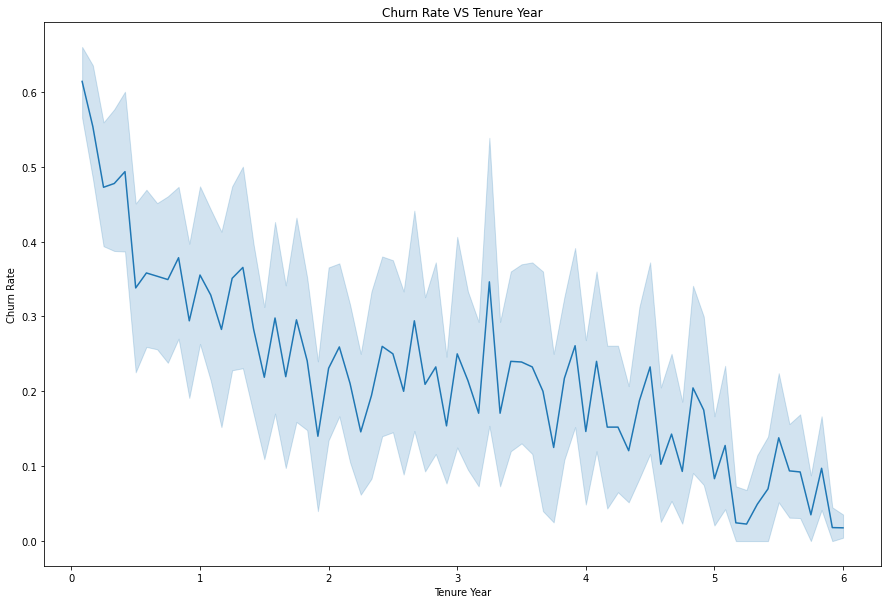

In [9]:
# the relatioship between churn rate and tenure in years
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="tenure_years", y= "churn", data=X_train)
plt.title("Churn Rate VS Tenure Year")
ax.set_xlabel("Tenure Year")
ax.set_ylabel("Churn Rate")
plt.show()

Takeaway from Churn Rate VS Tenure Year: Generally speaking, the longer the tenure, the lower the churn rate

Text(0, 0.5, 'Churn Rate')

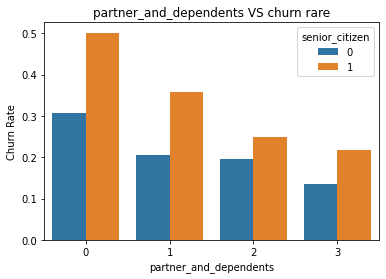

In [10]:
plt.title('partner_and_dependents VS churn rare')
ax = sns.barplot(x="partner_and_dependents", y="churn", hue = 'senior_citizen', ci=None, data=X_train)
ax.set_ylabel("Churn Rate")

Takeaways: It seems custmoers being as senior citizens always have a lower churn rate no matter they have partner and dependent or not!

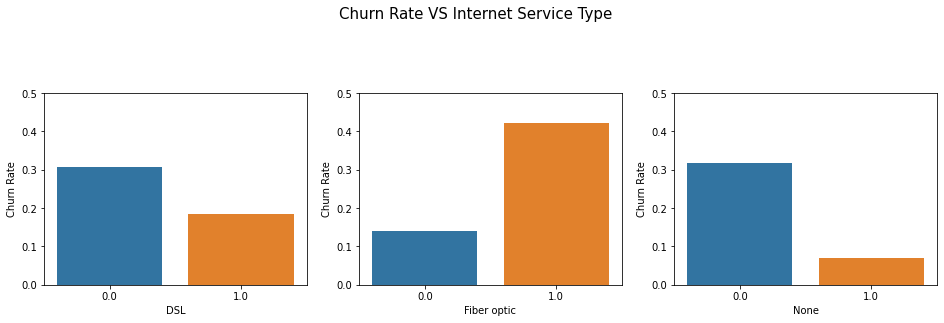

In [11]:
plt.figure(figsize=(16, 12))
plt.suptitle('Churn Rate VS Internet Service Type', fontsize=15)

plt.subplot(331)
ax = sns.barplot(x="DSL", y="churn", ci=None, data=X_train)
ax.set_ylabel("Churn Rate")
plt.ylim(0, .5)

plt.subplot(332)
ax = sns.barplot(x="Fiber optic", y="churn", ci=None, data=X_train)
ax.set_ylabel("Churn Rate")
plt.ylim(0, .5)

plt.subplot(333)
ax = sns.barplot(x="None", y="churn", ci=None, data=X_train)
ax.set_ylabel("Churn Rate")
plt.ylim(0, .5)
plt.show()


Takeways: Comparing with other internet service, Fiber optic has the highest churn rate, while None internet service has the lowest churn rate.

## Hypothesis Testing
### T_Test for Tenure vs Churn
$H_0$: there is no difference in tenure between customers who are still with telco and who have churned

$H_a$: there is a difference in tenure between customers who are still with telco and who have churned

In [12]:
# since churn is a categorical variable, and tenure_years is a continous variable, use T-Test
alpha = 0.05
x1 = X_train[X_train.churn == 1].tenure_years
x2 = X_train[X_train.churn == 0].tenure_years

In [13]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 

(-25.215509105871295, 2.441569523640957e-131)

In [14]:
print(f'''
Because p ({p:.4f}) < alpha (0.05), reject the null hypothesis, which means there is a statistically significant
diffrence in tenure between customers who are still with telco and who have churned.
''')


Because p (0.0000) < alpha (0.05), reject the null hypothesis, which means there is a statistically significant
diffrence in tenure between customers who are still with telco and who have churned.



Text(0.5, 1.0, 'Is tenure different among customers who are churned or not?')

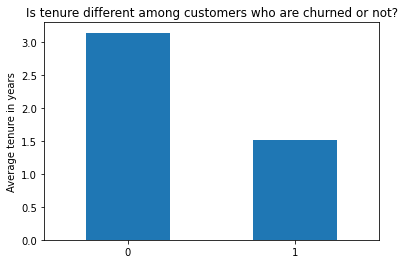

In [15]:
X_train.groupby('churn').tenure_years.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average tenure in years')
plt.title('Is tenure different among customers who are churned or not?')

### Pearson's correlation coefficient test

𝐻0 : There is no linear correlation between monthly charges and Fiber optic(one type of internent service)

𝐻𝑎:  There is a linear correlation between monthly charges and Fiber optic(one type of internent service)

In [16]:
# set alpha value to .01
alpha = .01 
r, p = stats.pearsonr(X_train.monthly_charges, X_train['Fiber optic'])

if p < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject our null hypothesis")

print("R is", r)
print("p is", p)

Reject the null hypothesis
R is 0.7875406312982911
p is 0.0


Takeaways: There is a strong linear correlation between monthly charges and Fiber optic(one type of internent service)

### Chi squared test

Since vast majority variables in the dataset are categorical variables, here it would be great to apply the Chi squared test for testing independence between variables

In [17]:
# Set alpha value
alpha = 0.05

for col in X_train.columns:

    a, b = X_train[col], X_train["churn"]

    observed = pd.crosstab(a, b) 
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        # Reject the null hypothesis
        print("({} and churn) are  dependent of each other. (p = {})".format(col, p))
    else:
         # Failed to reject the null hypothesis
        print("({} and churn) are  independent of each other. (p = {})".format(col, p))

(gender and churn) are  independent of each other. (p = 0.8056180626241757)
(senior_citizen and churn) are  dependent of each other. (p = 1.5432311139815586e-25)
(online_security and churn) are  dependent of each other. (p = 1.16495887174898e-120)
(online_backup and churn) are  dependent of each other. (p = 1.8529124821490668e-86)
(device_protection and churn) are  dependent of each other. (p = 1.3851372601721424e-78)
(tech_support and churn) are  dependent of each other. (p = 2.4370688872957734e-118)
(streaming_tv and churn) are  dependent of each other. (p = 6.745176768523967e-54)
(streaming_movies and churn) are  dependent of each other. (p = 1.0230251788873491e-53)
(paperless_billing and churn) are  dependent of each other. (p = 2.6537820862110215e-35)
(monthly_charges and churn) are  dependent of each other. (p = 1.613428816613666e-10)
(total_charges and churn) are  independent of each other. (p = 0.5306597395541117)
(churn and churn) are  dependent of each other. (p = 0.0)
(tenur

Takeaways: Vast majority of variables are dependent with churn, except gender and total_charges are independent with churn respectively.

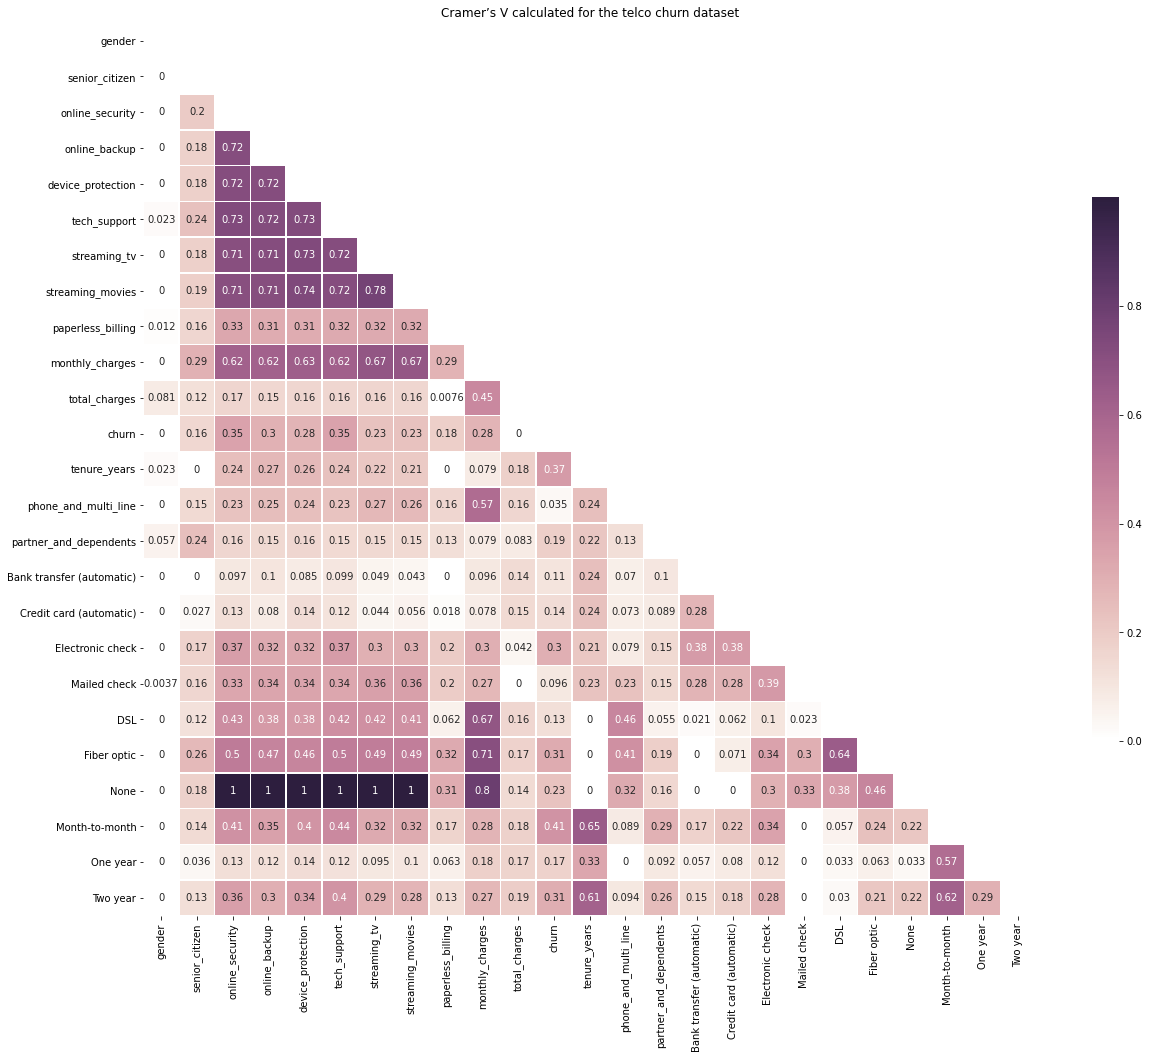

In [18]:
# Cramer's V is a statistic used to measure the strength of association between two nominal variables, 
# and it take values from 0 to 1. Values close to 0 indicate a weak association between the variables
# and values close to 1 indicate a strong association between the variables.
import itertools
def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(X_train.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate s of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    a, b = X_train[col1], X_train[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(a,b) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Cramer’s V calculated for the telco churn dataset')
plt.show()

Takeaway from the above heatmap: Except gender and total_charges, all features have some kind of association with churn, although all of the associations are not strong. Nevertheless, the strongest association exists between Month_to_month(contract_type) and tenure, the Cramer's V value is 0.41.

## Modeling

In [19]:
X_train = X_train.drop(['churn'],axis=1)
X_validate = X_validate.drop(['churn'],axis=1)
X_test = X_test.drop(['churn'],axis=1)

In [20]:
X_train.head(1)

,gender,senior_citizen,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,tenure_years,phone_and_multi_line,partner_and_dependents,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic,None,Month-to-month,One year,Two year
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
3714-JTVOV,0,1,2,0,0,0,0,0,1,74.15,3229.4,3.5,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Using different algorithms to modeling with all features

In [21]:
# logistic regression model
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.836323,0.669528,0.801778,0.752925,0.791548
recall,0.906440,0.516556,0.801778,0.711498,0.801778
f1-score,0.869971,0.583178,0.801778,0.726574,0.792983
support,823.000000,302.000000,0.801778,1125.000000,1125.000000


In [22]:
# choose the best model to apply the test data 
y_pred = model.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.839416,0.646302,0.796731,0.742859,0.787672
recall,0.893204,0.533156,0.796731,0.713180,0.796731
f1-score,0.865475,0.584302,0.796731,0.724889,0.790136
support,1030.000000,377.000000,0.796731,1407.000000,1407.000000


### Insights drawn: The tentative best model
Using logistic regression algorithm with all features since it has the highest accuracy value(0.8018). In addition, when apply test data to the model, the accuracy value(0.7967) and f1-score are all pretty close to the validate data's value.

In [23]:
# Decision tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.800412,0.705882,0.787556,0.753147,0.775036
recall,0.945322,0.357616,0.787556,0.651469,0.787556
f1-score,0.866852,0.474725,0.787556,0.670789,0.761588
support,823.000000,302.000000,0.787556,1125.000000,1125.000000


In [24]:
# Random forest tree model
rf = RandomForestClassifier(min_samples_leaf=5, max_depth=10,random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.833705,0.668122,0.8,0.750914,0.789255
recall,0.907655,0.506623,0.8,0.707139,0.800000
f1-score,0.869110,0.576271,0.8,0.722691,0.790499
support,823.000000,302.000000,0.8,1125.000000,1125.000000


In [25]:
# K-Nearest Neighbors Model(KNN)
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.816303,0.559055,0.758222,0.687679,0.747246
recall,0.863913,0.470199,0.758222,0.667056,0.758222
f1-score,0.839433,0.510791,0.758222,0.675112,0.751211
support,823.000000,302.000000,0.758222,1125.000000,1125.000000


### Using different algorithms to modeling with five selected features

In [26]:
X_train = X_train[['Month-to-month','tenure_years','online_security','tech_support','Fiber optic']]
X_validate = X_validate[['Month-to-month','tenure_years','online_security','tech_support','Fiber optic']]
X_test = X_test[['Month-to-month','tenure_years','online_security','tech_support','Fiber optic']]

In [27]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.828283,0.636752,0.788444,0.732517,0.776867
recall,0.896719,0.493377,0.788444,0.695048,0.788444
f1-score,0.861144,0.555970,0.788444,0.708557,0.779221
support,823.000000,302.000000,0.788444,1125.000000,1125.000000


In [28]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.800412,0.705882,0.787556,0.753147,0.775036
recall,0.945322,0.357616,0.787556,0.651469,0.787556
f1-score,0.866852,0.474725,0.787556,0.670789,0.761588
support,823.000000,302.000000,0.787556,1125.000000,1125.000000


In [29]:
rf = RandomForestClassifier(min_samples_leaf=5, max_depth=10,random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.839623,0.599278,0.780444,0.719450,0.775103
recall,0.865128,0.549669,0.780444,0.707398,0.780444
f1-score,0.852184,0.573402,0.780444,0.712793,0.777347
support,823.000000,302.000000,0.780444,1125.000000,1125.000000


In [30]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.821176,0.545455,0.753778,0.683316,0.747160
recall,0.848117,0.496689,0.753778,0.672403,0.753778
f1-score,0.834429,0.519931,0.753778,0.677180,0.750004
support,823.000000,302.000000,0.753778,1125.000000,1125.000000


### Using different algorithms to modeling with four selected features

In [31]:
X_train = X_train[['Month-to-month','tenure_years','online_security','tech_support']]
X_validate = X_validate[['Month-to-month','tenure_years','online_security','tech_support']]
X_test = X_test[['Month-to-month','tenure_years','online_security','tech_support']]

In [32]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.827273,0.612245,0.780444,0.719759,0.769550
recall,0.884569,0.496689,0.780444,0.690629,0.780444
f1-score,0.854962,0.548446,0.780444,0.701704,0.772679
support,823.000000,302.000000,0.780444,1125.000000,1125.000000


In [33]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.795478,0.677632,0.779556,0.736555,0.763843
recall,0.940462,0.341060,0.779556,0.640761,0.779556
f1-score,0.861915,0.453744,0.779556,0.657830,0.752344
support,823.000000,302.000000,0.779556,1125.000000,1125.000000


In [34]:
rf = RandomForestClassifier(min_samples_leaf=5, max_depth=10,random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.810515,0.608491,0.772444,0.709503,0.756283
recall,0.899149,0.427152,0.772444,0.663151,0.772444
f1-score,0.852535,0.501946,0.772444,0.677240,0.758421
support,823.000000,302.000000,0.772444,1125.000000,1125.000000


In [35]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.800000,0.485185,0.724444,0.642593,0.715490
recall,0.831106,0.433775,0.724444,0.632440,0.724444
f1-score,0.815256,0.458042,0.724444,0.636649,0.719364
support,823.000000,302.000000,0.724444,1125.000000,1125.000000


### Using different algorithms to modeling with two selected features

In [36]:
X_train = X_train[['Month-to-month','tenure_years']]
X_validate = X_validate[['Month-to-month','tenure_years']]
X_test = X_test[['Month-to-month','tenure_years']]

In [37]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.777665,0.592857,0.754667,0.685261,0.728054
recall,0.930741,0.274834,0.754667,0.602788,0.754667
f1-score,0.847345,0.375566,0.754667,0.611455,0.720699
support,823.000000,302.000000,0.754667,1125.000000,1125.000000


In [38]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.805310,0.570136,0.759111,0.687723,0.742179
recall,0.884569,0.417219,0.759111,0.650894,0.759111
f1-score,0.843080,0.481836,0.759111,0.662458,0.746106
support,823.000000,302.000000,0.759111,1125.000000,1125.000000


In [39]:
rf = RandomForestClassifier(min_samples_leaf=5, max_depth=10,random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.777665,0.592857,0.754667,0.685261,0.728054
recall,0.930741,0.274834,0.754667,0.602788,0.754667
f1-score,0.847345,0.375566,0.754667,0.611455,0.720699
support,823.000000,302.000000,0.754667,1125.000000,1125.000000


In [40]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.762332,0.386266,0.684444,0.574299,0.661379
recall,0.826245,0.298013,0.684444,0.562129,0.684444
f1-score,0.793003,0.336449,0.684444,0.564726,0.670443
support,823.000000,302.000000,0.684444,1125.000000,1125.000000


In [41]:
# choose the best model to apply the test data 
#y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))